# 영업 성공 여부 분류 경진대회

## 1. 데이터 확인

### 필수 라이브러리

In [31]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns', None)

### 데이터 셋 읽어오기

In [52]:
df_train = pd.read_csv("train.csv") # 학습용 데이터
df_test = pd.read_csv("submission.csv") # 테스트 데이터(제출파일의 데이터)

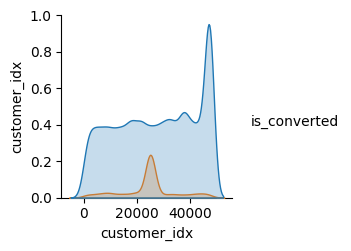

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

X=df_train[['customer_idx','customer_country','enterprise','customer_position','is_converted']]

sns.pairplot( X, hue='is_converted');
plt.show()

결측치 개수 출력

In [6]:
#각 열별 결측치 개수 출력
missing_values = df_train.isnull().sum()
# 결과 출력
missing_values.head(40)

bant_submit                    0
customer_country               0
business_unit                  0
com_reg_ver_win_rate       44731
customer_idx                   0
customer_type              43961
enterprise                     0
historical_existing_cnt    45543
id_strategic_ver           55855
it_strategic_ver           58178
idit_strategic_ver         54734
customer_job               18733
lead_desc_length               0
inquiry_type                 941
product_category           19374
product_subcategory        50064
product_modelname          50070
customer_country.1           982
customer_position              0
response_corporate             0
expected_timeline          30863
ver_cus                        0
ver_pro                        0
ver_win_rate_x             40882
ver_win_ratio_per_bu       43995
business_area              40882
business_subarea           53773
lead_owner                     0
is_converted                   0
dtype: int64

In [54]:
#최빈값과 개수 구하는 코드
mode_value = df_train['com_reg_ver_win_rate'].mode()[0]
mode_count = df_train['com_reg_ver_win_rate'].value_counts()[mode_value]
print("최빈값:", mode_value)
print("최빈값 개수:", mode_count)

# 'com_reg_ver_win_rate' 열의 평균값 구하기
mean_value = df_train['com_reg_ver_win_rate'].mean()
print("평균값:", mean_value)

# 'com_reg_ver_win_rate' 열의 최대값 구하기
max_value = df_train['com_reg_ver_win_rate'].max()
print("최대값:", max_value)

# 'com_reg_ver_win_rate' 열의 최소값 구하기
min_value = df_train['com_reg_ver_win_rate'].min()
print("최소값:", min_value)

#com_reg_ver_win_rate Nan을 평균값으로 채우기
df_train['com_reg_ver_win_rate'].fillna(min_value, inplace=True)
df_test['com_reg_ver_win_rate'].fillna(min_value, inplace=True)


#ver_win_rate_x Nan을 평균값으로 채우기
#최빈값과 개수 구하는 코드
mode_value = df_train['ver_win_rate_x'].mode()[0]
mode_count = df_train['ver_win_rate_x'].value_counts()[mode_value]
print("최빈값:", mode_value)
print("최빈값 개수:", mode_count)

# 'com_reg_ver_win_rate' 열의 평균값 구하기
mean_value = df_train['ver_win_rate_x'].mean()
print("평균값:", mean_value)

# 'com_reg_ver_win_rate' 열의 최대값 구하기
max_value = df_train['ver_win_rate_x'].max()
print("최대값:", max_value)

# 'com_reg_ver_win_rate' 열의 최소값 구하기
min_value = df_train['ver_win_rate_x'].min()
print("최소값:", min_value)

#com_reg_ver_win_rate Nan을 평균값으로 채우기
df_train['ver_win_rate_x'].fillna(min_value, inplace=True)
df_test['ver_win_rate_x'].fillna(min_value, inplace=True)


#ver_win_rate_x Nan을 평균값으로 채우기
#최빈값과 개수 구하는 코드
mode_value = df_train['ver_win_ratio_per_bu'].mode()[0]
mode_count = df_train['ver_win_ratio_per_bu'].value_counts()[mode_value]
print("최빈값:", mode_value)
print("최빈값 개수:", mode_count)

# 'com_reg_ver_win_rate' 열의 평균값 구하기
mean_value = df_train['ver_win_ratio_per_bu'].mean()
print("평균값:", mean_value)

# 'com_reg_ver_win_rate' 열의 최대값 구하기
max_value = df_train['ver_win_ratio_per_bu'].max()
print("최대값:", max_value)

# 'com_reg_ver_win_rate' 열의 최소값 구하기
min_value = df_train['ver_win_ratio_per_bu'].min()
print("최소값:", min_value)

#com_reg_ver_win_rate Nan을 평균값으로 채우기
df_train['ver_win_ratio_per_bu'].fillna(min_value, inplace=True)
df_test['ver_win_ratio_per_bu'].fillna(min_value, inplace=True)

최빈값: 0.0037878787878787
최빈값 개수: 45444
평균값: 0.025381503857707266
최대값: 1.0
최소값: 0.0037878787878787
최빈값: 2.3159381337232847e-06
최빈값 개수: 40995
평균값: 0.000348544033028668
최대값: 0.0030792876608617
최소값: 2.3159381337232847e-06
최빈값: 0.0115830115830115
최빈값 개수: 44783
평균값: 0.02131402638605597
최대값: 0.2857142857142857
최소값: 0.0115830115830115


/var/folders/vf/rj1wvhz93zdflq1xr_gs8ll00000gn/T/ipykernel_60901/3268117098.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['com_reg_ver_win_rate'].fillna(min_value, inplace=True)
/var/folders/vf/rj1wvhz93zdflq1xr_gs8ll00000gn/T/ipykernel_60901/3268117098.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

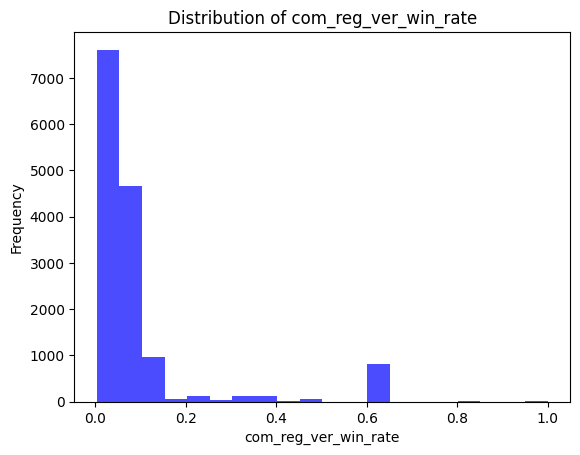

In [39]:
import matplotlib.pyplot as plt

# com_reg_ver_win_rate 컬럼의 값 분포를 히스토그램으로 시각화
plt.hist(df_train['com_reg_ver_win_rate'], bins=20, color='blue', alpha=0.7)
plt.xlabel('com_reg_ver_win_rate')
plt.ylabel('Frequency')
plt.title('Distribution of com_reg_ver_win_rate')
plt.show()

In [29]:
# condition=df_train[(df_train['business_unit']=='ID')&(df_train['id_strategic_ver']==1)].shape[0]
condition=df_train[(df_train['business_unit']=='ID')&(df_train['id_strategic_ver']==1)&(df_train['is_converted']==True)].shape[0]
print(condition)
# # business_unit이 'id'이고 id_strategic_ver이 1이며 is_converted가 True인 행의 개수 출력
# condition = (df_train['business_unit'] == 'ID') & (df_train['id_strategic_ver'] == 1) & (df_train['is_converted'] == True)
# count_matching_rows = df[condition].shape[0]

# print(f"조건에 해당하는 행의 개수: {count_matching_rows}")

335


In [34]:
df_train

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,idit_strategic_ver,customer_job,lead_desc_length,inquiry_type,product_category,product_subcategory,product_modelname,customer_country.1,customer_position,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.00,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,NaN,purchasing,62,Quotation or purchase consultation,multi-split,NaN,NaN,/Quezon City/Philippines,entry level,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.00,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,NaN,media and communication,96,Quotation or purchase consultation,multi-split,NaN,NaN,/PH-00/Philippines,ceo/founder,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.00,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,NaN,engineering,56,Product Information,single-split,NaN,NaN,/Kolkata /India,partner,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.00,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,NaN,entrepreneurship,44,Quotation or purchase consultation,vrf,NaN,NaN,/Bhubaneswar/India,ceo/founder,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.00,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,NaN,consulting,97,Quotation or purchase consultation,multi-split,NaN,NaN,/Hyderabad/India,partner,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59294,1.00,/Sląskie/Poland,AS,0.003788,33747,End Customer,SMB,NaN,NaN,NaN,NaN,engineering,200,Product Information,vrf,NaN,NaN,/Sląskie/Poland,entry level,LGEPL,3 months ~ 6 months,0,0,0.000026,0.028777,public facility,Others,694,False
59295,0.75,/Bogotá DC /Colombia,AS,0.040000,35420,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,NaN,entrepreneurship,70,NaN,etc.,NaN,NaN,/Bogotá DC /Colombia,trainee,LGECB,9 months ~ 1 year,0,0,0.000026,0.028777,public facility,NaN,39,False
59296,0.75,/Pisco/Peru,AS,0.040000,19249,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,NaN,engineering,34,NaN,single-split,NaN,NaN,/Pisco/Peru,entry level,LGEPR,less than 3 months,0,0,0.000026,0.028777,public facility,NaN,125,False
59297,1.00,/santa cruz bolivia/Peru,AS,0.040000,40327,NaN,Enterprise,NaN,NaN,NaN,NaN,entrepreneurship,377,Quotation or Purchase Consultation,etc.,NaN,NaN,/santa cruz bolivia/Peru,others,LGEPR,more than a year,0,0,0.000026,0.028777,public facility,NaN,134,False


In [55]:
df_train=df_train.drop(columns=["customer_country.1","product_subcategory","product_modelname"])
df_test=df_test.drop(columns=["customer_country.1","product_subcategory","product_modelname"])

원핫인코딩 'business_unit', 'enterprise','customer_job','product_category'

In [56]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 객체 생성
encoder = OneHotEncoder(handle_unknown='ignore')

# train 데이터의 범주형 변수들을 원핫인코딩
encoded_train = encoder.fit_transform(df_train[['business_unit', 'enterprise']])
# test 데이터의 범주형 변수들을 원핫인코딩
encoded_test = encoder.transform(df_test[['business_unit', 'enterprise']])

In [57]:
# 원핫인코딩된 데이터를 DataFrame으로 변환
df_train_encoded = pd.DataFrame(encoded_train.toarray(), columns=encoder.get_feature_names_out(['business_unit', 'enterprise']))
df_test_encoded = pd.DataFrame(encoded_test.toarray(), columns=encoder.get_feature_names_out(['business_unit', 'enterprise']))

# 원핫인코딩된 열을 기존 DataFrame과 결합
df_train_final = pd.concat([df_train.drop(['business_unit', 'enterprise'], axis=1), df_train_encoded], axis=1)
df_test_final = pd.concat([df_test.drop(['business_unit', 'enterprise'], axis=1), df_test_encoded], axis=1)

In [58]:
df_train=df_train_final
df_test=df_test_final

## 2. 데이터 전처리

### 레이블 인코딩

In [59]:
def label_encoding(series: pd.Series) -> pd.Series:
    """범주형 데이터를 시리즈 형태로 받아 숫자형 데이터로 변환합니다."""

    my_dict = {}

    # 모든 요소를 문자열로 변환
    series = series.astype(str)

    for idx, value in enumerate(sorted(series.unique())):
        my_dict[value] = idx
    series = series.map(my_dict)

    return series

'business_unit', 'enterprise','customer_type','customer_job','inquiry_type','product_modelname','product_category','product_subcategory','response_corporate'], axis=1), df_train_encoded

In [60]:
# 레이블 인코딩할 칼럼들
label_columns = [
    "customer_country",
    #"country",
    "business_subarea",
    "business_area",
    #"business_unit",
    "customer_type",
    #"enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    #"product_subcategory",
    #"product_modelname",
    #"customer_country.1",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]

df_all = pd.concat([df_train[label_columns], df_test[label_columns]])

for col in label_columns:
    df_all[col] = label_encoding(df_all[col])

In [61]:
for col in label_columns:  
    df_train[col] = df_all.iloc[: len(df_train)][col]
    df_test[col] = df_all.iloc[len(df_train) :][col]

In [30]:
import jinja2

corr=df_train.corr()
corr.style.background_gradient(cmap='coolwarm')

/Users/beomjunpark/Desktop/B2B/lgaimers/lib/python3.10/site-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/beomjunpark/Desktop/B2B/lgaimers/lib/python3.10/site-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,idit_strategic_ver,customer_job,lead_desc_length,inquiry_type,product_category,product_subcategory,product_modelname,customer_position,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
bant_submit,1.000000,-0.006299,0.079169,-0.358328,-0.103236,0.007695,0.039490,-0.201929,nan,nan,nan,-0.167575,0.117897,-0.074989,-0.095545,-0.145166,-0.109353,-0.366782,-0.192107,-0.440996,0.100217,0.131256,0.091302,-0.059189,-0.010682,-0.127325,-0.136132,-0.002480
customer_country,-0.006299,1.000000,-0.029896,0.312647,-0.038113,-0.118601,0.092988,0.064833,nan,nan,nan,0.050531,0.008614,0.175829,-0.003212,0.003176,0.122209,-0.001258,0.262582,0.000621,0.001821,-0.055389,-0.099944,0.004514,-0.013078,-0.037765,0.064238,0.037216
business_unit,0.079169,-0.029896,1.000000,0.451869,-0.080316,-0.041435,0.137091,-0.219425,nan,nan,nan,-0.041466,-0.015578,-0.233757,-0.237065,-0.283731,-0.272037,0.008157,-0.071075,-0.061679,0.035453,0.136995,-0.027769,0.519091,-0.081813,-0.046391,0.386290,0.072386
com_reg_ver_win_rate,-0.358328,0.312647,0.451869,1.000000,-0.001035,-0.352834,0.168856,-0.084781,nan,nan,nan,0.138828,-0.103671,-0.100074,-0.027256,0.061686,0.079562,0.177232,0.325005,0.102330,-0.085479,-0.077734,-0.258941,0.446932,-0.063253,-0.201142,0.421827,0.342590
customer_idx,-0.103236,-0.038113,-0.080316,-0.001035,1.000000,0.012523,-0.159490,0.129121,nan,nan,nan,0.107416,-0.047099,-0.008500,-0.043985,0.068751,0.061048,0.061611,-0.055576,0.015834,-0.037796,-0.048979,-0.017452,0.005820,0.017711,0.062135,-0.040203,-0.056425
customer_type,0.007695,-0.118601,-0.041435,-0.352834,0.012523,1.000000,-0.161899,-0.052600,nan,nan,nan,-0.005788,-0.148566,0.164152,-0.038777,0.075246,0.035503,-0.019733,-0.197081,-0.004294,-0.384756,-0.088560,0.016583,-0.114302,0.059328,0.405708,-0.051562,-0.102505
enterprise,0.039490,0.092988,0.137091,0.168856,-0.159490,-0.161899,1.000000,-0.085669,nan,nan,nan,-0.024255,0.197304,-0.034391,0.064509,-0.092604,-0.127873,-0.024347,0.151074,-0.016022,0.082883,0.120540,0.094741,0.128675,-0.075200,-0.115143,0.125673,0.124941
historical_existing_cnt,-0.201929,0.064833,-0.219425,-0.084781,0.129121,-0.052600,-0.085669,1.000000,nan,nan,nan,0.082263,0.023398,0.046676,0.128884,0.040242,0.033882,0.093046,0.123077,0.085811,-0.014322,0.021884,0.078515,0.000799,0.026188,0.033873,0.192473,-0.004490
id_strategic_ver,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
it_strategic_ver,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


다시 학습 데이터와 제출 데이터를 분리합니다.

### 2-2. 학습, 검증 데이터 분리

In [62]:
x_train, x_val, y_train, y_val = train_test_split(
    df_train.drop("is_converted", axis=1),
    df_train["is_converted"],
    test_size=0.2,
    shuffle=True,
    random_state=400,
)

## 3. 모델 학습

### 모델 정의 

In [63]:
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier()

from xgboost import XGBClassifier       
model = XGBClassifier()

# from catboost import CatBoostClassifier
# model = CatBoostClassifier()


### 모델 학습

In [64]:
x_train = x_train.fillna(0)
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### 모델 성능 보기

In [47]:
def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])

    print("오차행렬:\n", confusion)
    print("\n정확도: {:.4f}".format(accuracy))
    print("정밀도: {:.4f}".format(precision))
    print("재현율: {:.4f}".format(recall))
    print("F1: {:.4f}".format(F1))

In [65]:
pred = model.predict(x_val.fillna(0))
get_clf_eval(y_val, pred)

오차행렬:
 [[  702   245]
 [  102 10811]]

정확도: 0.9707
정밀도: 0.8731
재현율: 0.7413
F1: 0.8018


## 4. 제출하기

### 테스트 데이터 예측

In [66]:
# 예측에 필요한 데이터 분리
x_test = df_test.drop(["is_converted","id"], axis=1)

In [67]:
test_pred = model.predict(x_test.fillna(0))
sum(test_pred) # True로 예측된 개수

527

### 제출 파일 작성

In [68]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["is_converted"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**